In [1]:
%load_ext autoreload
%autoreload 2
!hostname
!pwd
import os, sys
print(sys.executable)
os.environ['CUDA_VISIBLE_DEVICES'] = "5"
os.environ['XLA_PYTHON_CLIENT_PREALLOCATE'] = 'false'

fish-gcp005
/home/akarshkumar0101/nca-alife/src
/home/akarshkumar0101/miniconda3/envs/nca-alife-jax/bin/python


In [2]:
import os, sys, glob, pickle
from functools import partial

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from tqdm.auto import tqdm
from einops import rearrange, reduce, repeat

In [3]:
import experiment_utils
import util

# Create Experiment

In [4]:
! rm -rf ./experiments
! mkdir -p ./experiments

In [ ]:
group.add_argument("--seed", type=int, default=0)
group.add_argument("--save_dir", type=str, default=None)

group = parser.add_argument_group("model")
group.add_argument("--grid_size", type=int, default=64)
group.add_argument("--d_state", type=int, default=16)
group.add_argument("--n_groups", type=int, default=1)
group.add_argument("--rollout_steps", type=int, default=512)

group.add_argument("--identity_bias", type=float, default=0.)
group.add_argument("--temperature", type=float, default=1.0)

group = parser.add_argument_group("data")
group.add_argument("--prompts", type=str, default="an artificial cell,a bacterium")
group.add_argument("--clip_model", type=str, default="clip-vit-base-patch32") # clip-vit-base-patch32 or clip-vit-large-patch14

group = parser.add_argument_group("optimization")
group.add_argument("--bs", type=int, default=4)
group.add_argument("--pop_size", type=int, default=16)
group.add_argument("--n_iters", type=int, default=10000)
group.add_argument("--sigma", type=float, default=1.)

In [81]:
cfg_default = dict(
    seed=0, save_dir=None,
    grid_size=64, d_state=16, n_groups=1, rollout_steps=512,
    
    identity_bias=0., temperature=1.,

    prompts="", clip_model="clip-vit-base-patch32",
    
    bs=4, pop_size=16, n_iters=10000, sigma=1.
)

prompts_sweep = [
    # "a bacteria under the microscope",
    "a biological cell",
    "a diverse ecosystem of cells moving around",
    # "the game of life cellular automaton",
    # "an egg",
    # "the yellow sun",
    # "a fat cat",
    # "an apple",
]

identity_bias_sweep = [0., 1., 4.]
temperature_sweep = [1., 1/2., 1/4.]


cfgs = []

seed = 0
for i1, prompts in enumerate(prompts_sweep):
    for identity_bias in identity_bias_sweep:
        for temperature in temperature_sweep:
            cfg = cfg_default.copy()
            cfg.update(seed=seed, prompts=prompts, identity_bias=identity_bias, temperature=temperature)
            cfg.update(save_dir=f"/home/akarshkumar0101/nca-alife-data/dnca_2/{seed}_{i1}_{identity_bias}_{temperature}")
            
            cfg.update(n_iters=5000, d_state=6, n_groups=6)
            cfgs.append(cfg)

# print(cfgs)
print(len(cfgs))

18


In [82]:
commands = experiment_utils.create_commands(cfgs, prefix='python train_target_emergence_dnca.py', out_file='./experiments/main.sh')
print('\n'.join(commands[:3]), '\n...')
print(len(commands), 'commands')

python train_target_emergence_dnca.py --seed=0 --save_dir="/home/akarshkumar0101/nca-alife-data/dnca_2/0_0_0.0_1.0"  --grid_size=64 --d_state=6 --n_groups=6 --rollout_steps=512 --identity_bias=0.0 --temperature=1.0  --prompts="a biological cell"                          --clip_model="clip-vit-base-patch32" --bs=4 --pop_size=16 --n_iters=5000 --sigma=1.0
python train_target_emergence_dnca.py --seed=0 --save_dir="/home/akarshkumar0101/nca-alife-data/dnca_2/0_0_0.0_0.5"  --grid_size=64 --d_state=6 --n_groups=6 --rollout_steps=512 --identity_bias=0.0 --temperature=0.5  --prompts="a biological cell"                          --clip_model="clip-vit-base-patch32" --bs=4 --pop_size=16 --n_iters=5000 --sigma=1.0
python train_target_emergence_dnca.py --seed=0 --save_dir="/home/akarshkumar0101/nca-alife-data/dnca_2/0_0_0.0_0.25" --grid_size=64 --d_state=6 --n_groups=6 --rollout_steps=512 --identity_bias=0.0 --temperature=0.25 --prompts="a biological cell"                          --clip_model="cli

# Visualize Results

In [83]:
import jax
import jax.numpy as jnp
import copy

In [84]:
df = []
for cfg in tqdm(cfgs):
    save_dir = cfg['save_dir']
    dfi = copy.copy(cfg)

    _, loss = util.load_pkl(cfg['save_dir'], 'best')
    dfi['loss'] = loss.item()
    df.append(dfi)
df = pd.DataFrame(df)

  0%|          | 0/18 [00:00<?, ?it/s]

In [85]:
df

,seed,save_dir,grid_size,d_state,n_groups,rollout_steps,identity_bias,temperature,prompts,clip_model,bs,pop_size,n_iters,sigma,loss
0,0,/home/akarshkumar0101/nca-alife-data/dnca_2/0_...,64,6,6,512,0.0,1.00,a biological cell,clip-vit-base-patch32,4,16,5000,1.0,-0.299939
1,0,/home/akarshkumar0101/nca-alife-data/dnca_2/0_...,64,6,6,512,0.0,0.50,a biological cell,clip-vit-base-patch32,4,16,5000,1.0,-0.293358
2,0,/home/akarshkumar0101/nca-alife-data/dnca_2/0_...,64,6,6,512,0.0,0.25,a biological cell,clip-vit-base-patch32,4,16,5000,1.0,-0.294486
3,0,/home/akarshkumar0101/nca-alife-data/dnca_2/0_...,64,6,6,512,1.0,1.00,a biological cell,clip-vit-base-patch32,4,16,5000,1.0,-0.294792
4,0,/home/akarshkumar0101/nca-alife-data/dnca_2/0_...,64,6,6,512,1.0,0.50,a biological cell,clip-vit-base-patch32,4,16,5000,1.0,-0.292319
5,0,/home/akarshkumar0101/nca-alife-data/dnca_2/0_...,64,6,6,512,1.0,0.25,a biological cell,clip-vit-base-patch32,4,16,5000,1.0,-0.297220
6,0,/home/akarshkumar0101/nca-alife-data/dnca_2/0_...,64,6,6,512,4.0,1.00,a biological cell,clip-vit-base-patch32,4,16,5000,1.0,-0.296109
7,0,/home/akarshkumar0101/nca-alife-data/dnca_2/0_...,64,6,6,512,4.0,0.50,a biological cell,clip-vit-base-patch32,4,16,5000,1.0,-0.293450
8,0,/home/akarshkumar0101/nca-alife-data/dnca_2/0_...,64,6,6,512,4.0,0.25,a biological cell,clip-vit-base-patch32,4,16,5000,1.0,-0.293849
9,0,/home/akarshkumar0101/nca-alife-data/dnca_2/0_...,64,6,6,512,0.0,1.00,a diverse ecosystem of cells moving around,clip-vit-base-patch32,4,16,5000,1.0,-0.306652


<Axes: xlabel='temperature', ylabel='identity_bias'>

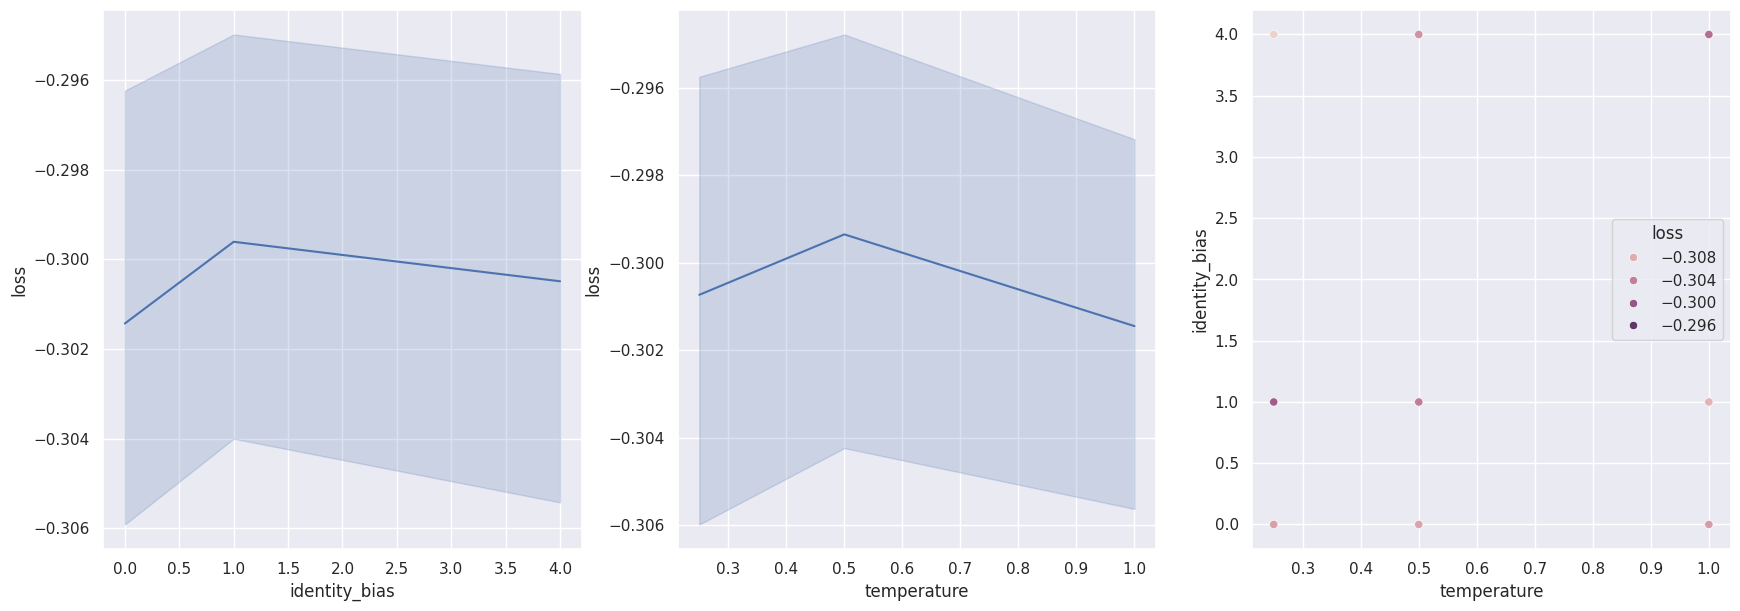

In [86]:
plt.figure(figsize=(21, 7))
plt.subplot(131)
sns.lineplot(data=df, x='identity_bias', y='loss')
plt.subplot(132)
sns.lineplot(data=df, x='temperature', y='loss')
plt.subplot(133)
sns.scatterplot(data=df, x='temperature', y='identity_bias', hue='loss')

  0%|          | 0/3 [00:00<?, ?it/s]

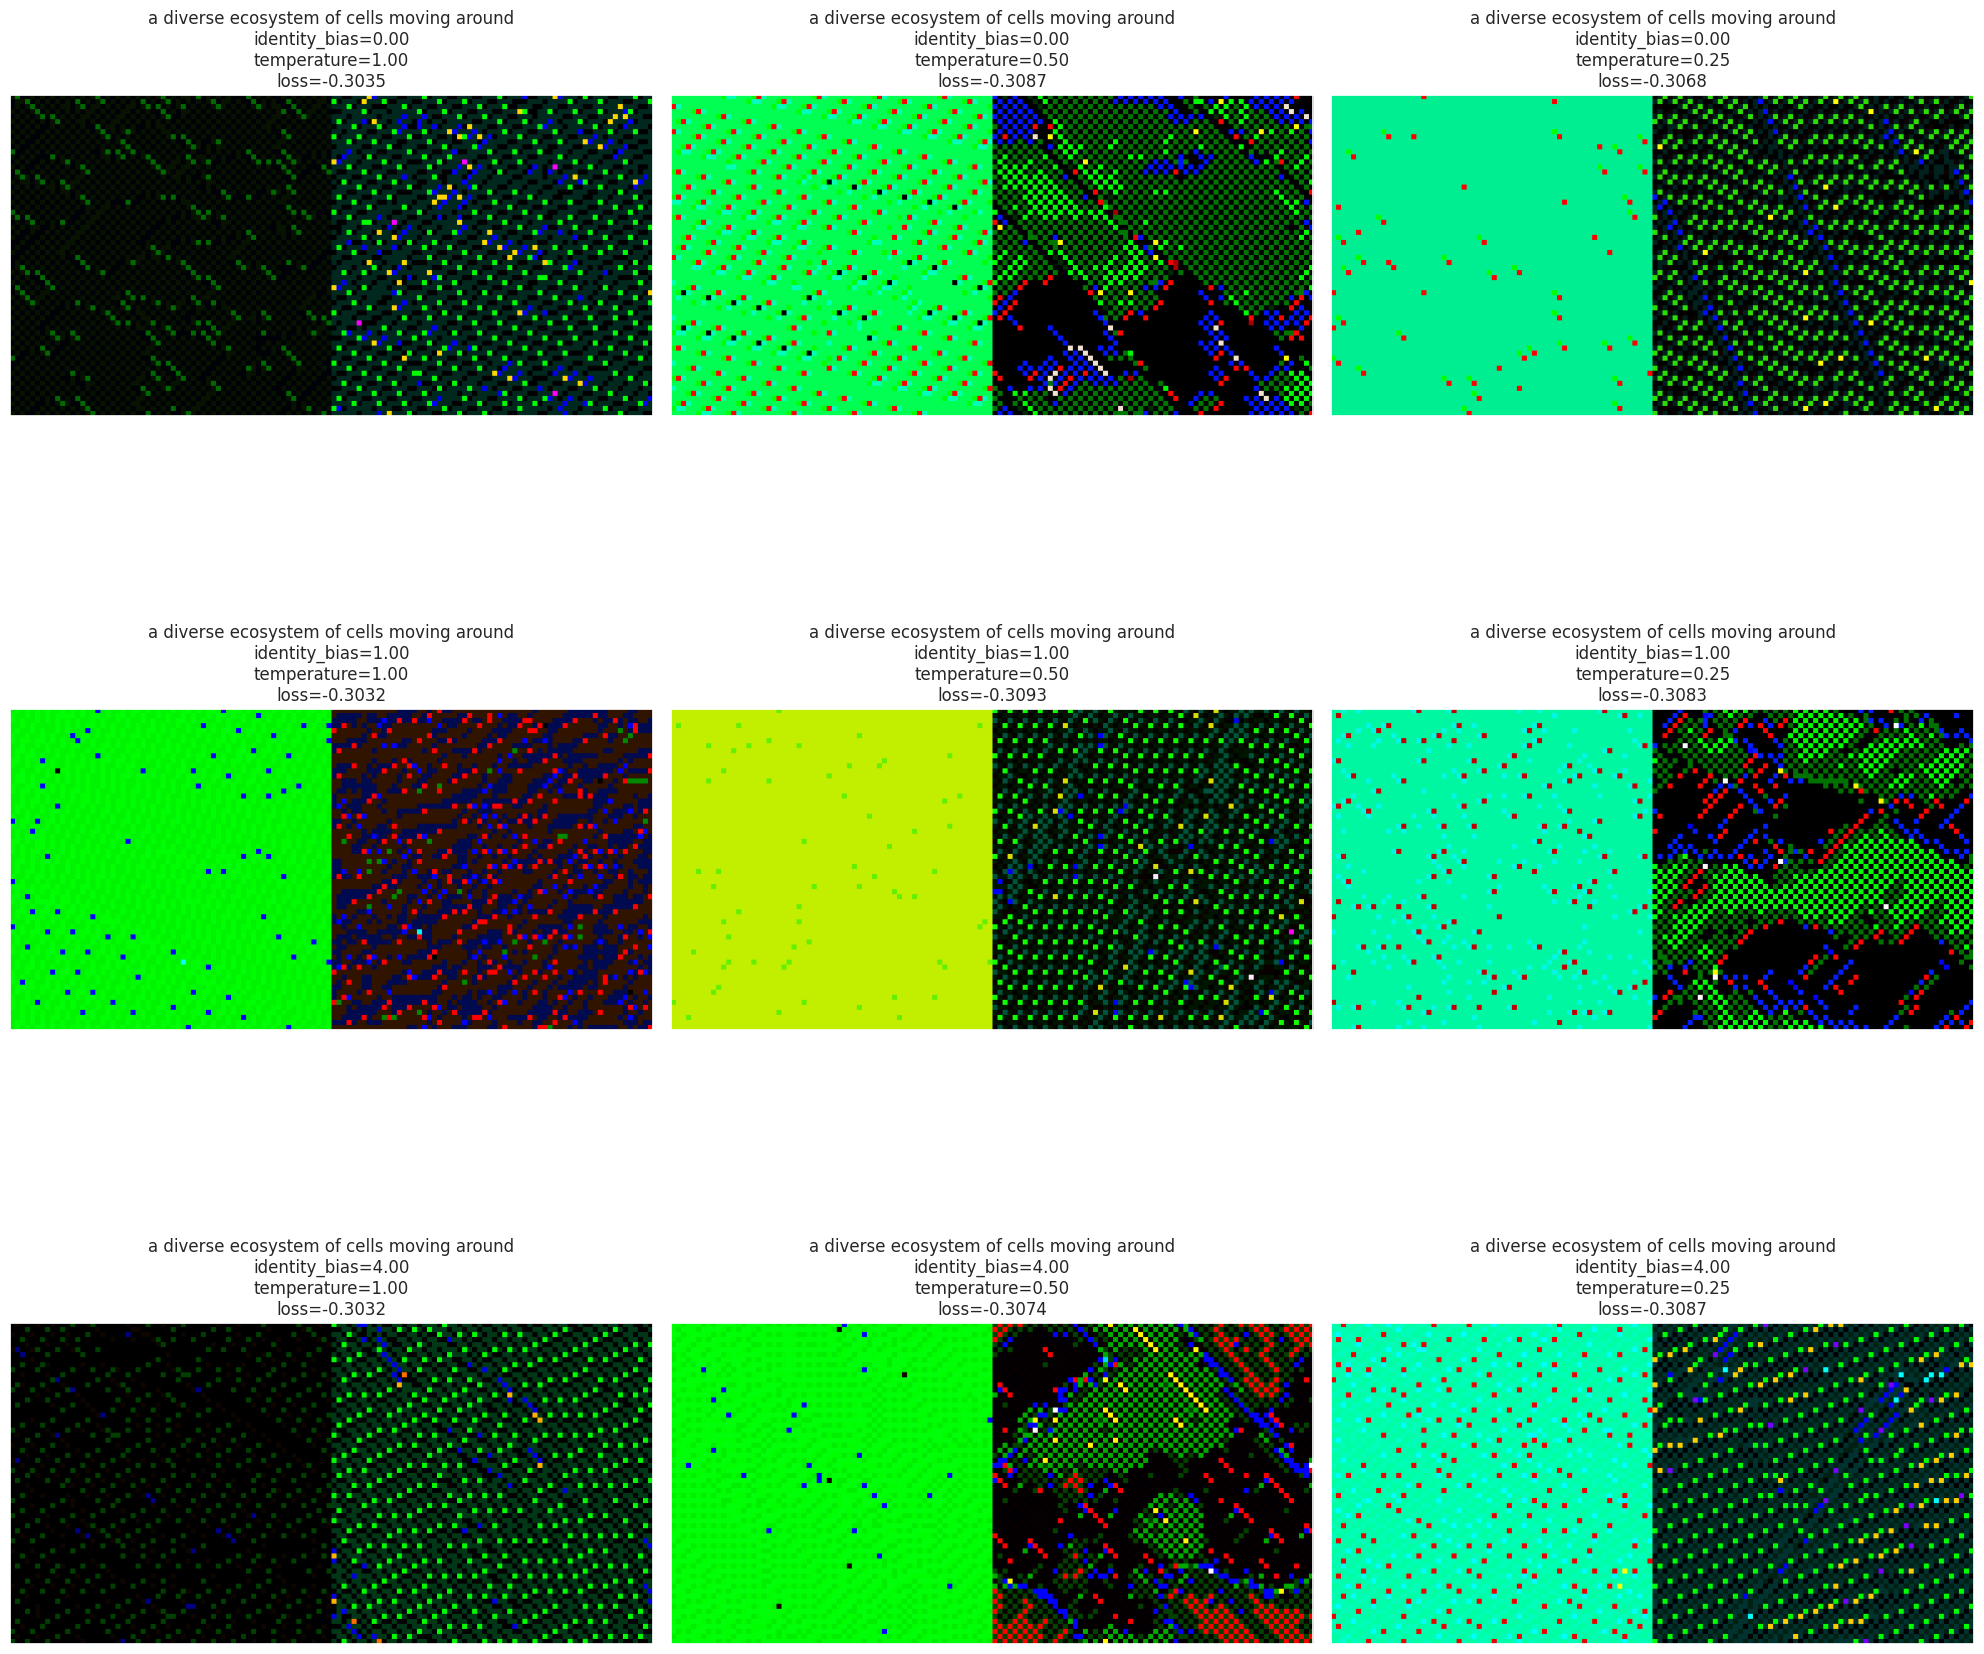

In [94]:
plt.figure(figsize=(20, 20))
iplt = 0
for identity_bias in tqdm(identity_bias_sweep):
    for temperature in temperature_sweep:
        img = []
        for i1, prompts in enumerate(prompts_sweep):
            save_dir=f"/home/akarshkumar0101/nca-alife-data/dnca_1/{seed}_{i1}_{identity_bias}_{temperature}"
            vid = util.load_pkl(save_dir, 'vid').astype(np.uint8)

            img.append(vid[511])
    
            params, loss = util.load_pkl(save_dir, 'best')
            loss = loss.item()
            
        img = np.stack(img)
        # print(img.shape)
        iplt+=1
        plt.subplot(3, 3, iplt)
        plt.imshow(rearrange(img, "(R C) H W D -> (R H) (C W) D", R=1))
        plt.grid(False); plt.xticks([]); plt.yticks([])
        plt.title(f"{prompts}\n{identity_bias=:.2f}\n{temperature=:.2f}\n{loss=:.4f}")

plt.tight_layout()
plt.show()
        

In [95]:
prompts_sweep

['a biological cell', 'a diverse ecosystem of cells moving around']

  0%|          | 0/3 [00:00<?, ?it/s]

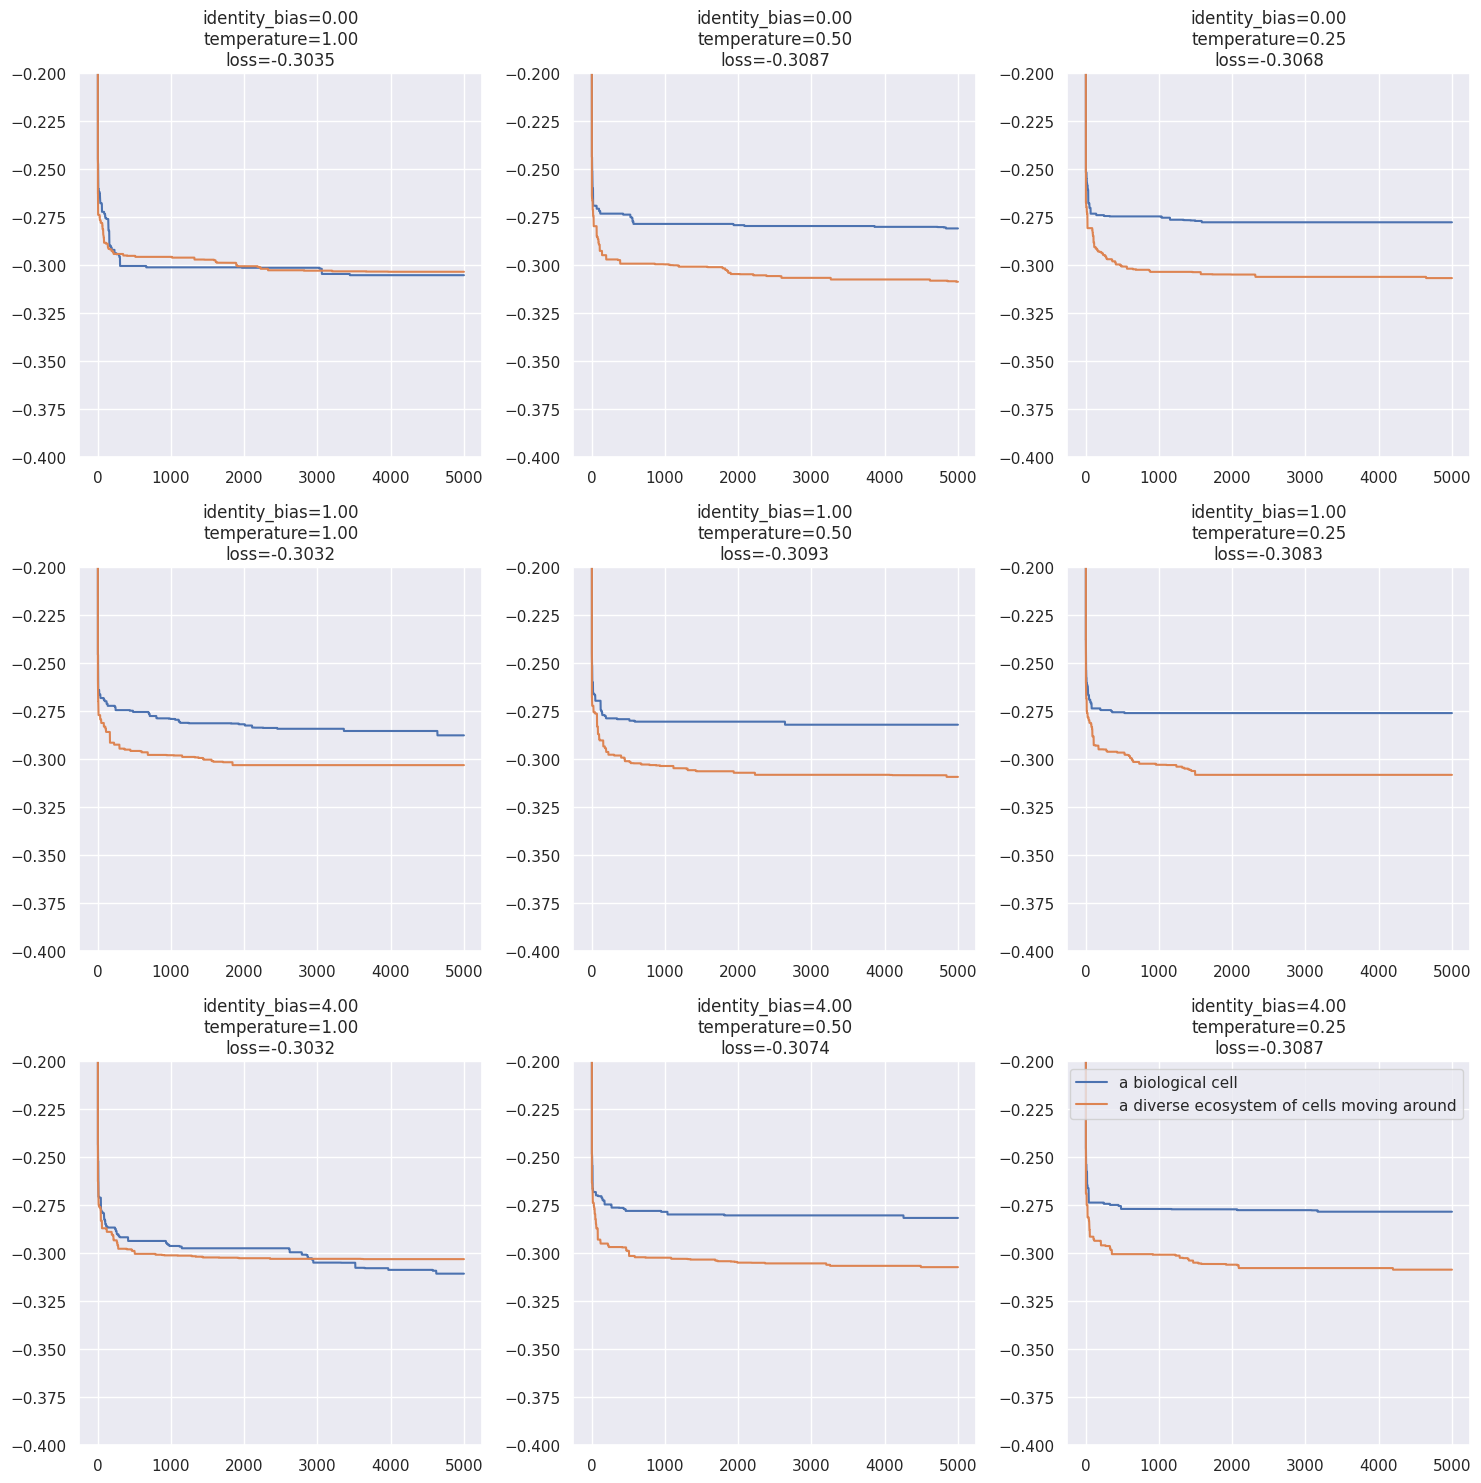

In [96]:
plt.figure(figsize=(15, 15))
iplt = 0
for identity_bias in tqdm(identity_bias_sweep):
    for temperature in temperature_sweep:
        iplt+=1
        plt.subplot(3, 3, iplt)
        for i1, prompts in enumerate(prompts_sweep):
            save_dir=f"/home/akarshkumar0101/nca-alife-data/dnca_1/{seed}_{i1}_{identity_bias}_{temperature}"
            data = util.load_pkl(save_dir, 'data')
            params, loss = util.load_pkl(save_dir, 'best')
            loss = loss.item()
            
            plt.plot(data['best_loss'], label=prompts)
        # plt.grid(False); plt.xticks([]); plt.yticks([])
        plt.title(f"{identity_bias=:.2f}\n{temperature=:.2f}\n{loss=:.4f}")
        plt.ylim(-.4, -.2)

plt.legend()
plt.tight_layout()
plt.show()
        